## Computer Vision Example

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

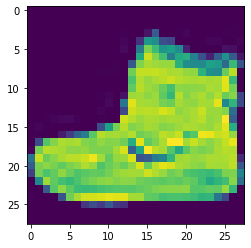

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_labels[0]

9

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_images[0]/255.0     # showing ouput value if image is normalized (0 to 1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# normalizing train and test images

train_images  = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# using DNN which has 3 layers: input, hidden, output

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),                                     # turning 28x28 image to 784x1
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),             # adds layer of neurons
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])          # each layer needs activation funcs

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.8966
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9012
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9031
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2460 - accuracy: 0.9082
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2370 - accuracy: 0.9108
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2293 - accuracy: 0.9138
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2195 - accuracy: 0.9188
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2143 - accuracy: 0.9201
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2075 - accuracy: 0.9208
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.200

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3414 - accuracy: 0.8860


[0.3414156138896942, 0.8859999775886536]

## Using Callback to restrict Loss

In [11]:
# function for loss restriction

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):
      print("\nLoss is less than 0.3 so cancelling training!")
      self.model.stop_training = True

In [12]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4738 - accuracy: 0.8317
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3562 - accuracy: 0.8695
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3228 - accuracy: 0.8813
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2977 - accuracy: 0.8896

Loss is less than 0.3 so cancelling training!


## MNIST Exercise

**Exercise 2**

In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

- It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger.
- When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
- If you add any additional variables, make sure you use the same names as the ones used in the class.

In [9]:
# function for accuracy restriction

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [10]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2025 - accuracy: 0.9407
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0791 - accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9908

Reached 99% accuracy so cancelling training!
